# NBA Injuries: 
## A Study of How Aggressive Play Style Effects Likelihood of Injury
#### Authors: Taiga Schwarz, Cameron Hosseiniyar, Elias Rodriguez

## I. Abstract: 

Injury prevention is an important topic in today's NBA, as an injury to a team's star player could ruin the team's chances of winning for the rest of the season. The act of preemptively resting players entire games, commonly known as "load management," has been a practice adopted by many teams to decrease the likelihood of injury occurring for their star players. While it makes intuitive sense that reducing a player's usage rate results in fewer opportunities for the player to become injured and thus a lower likelihood of injury, it is important to also consider if an individual's play style&mdash; isolated from usage rate&mdash; has a significant effect on injury likelihood. Understanding how different play styles effect injury likelihoods would be useful for teams to identify players with high injury potential and as a result would allow teams to optimize their load management practices. <br><br>In this project, we analyze the relationship between a player's likelihood of injury to a player's aggressiveness on offense and defense. Since aggressiveness is not a measureable statistic, we formulate a metric that quanitifies how aggressive a player is on offense and another metric that quantifies how aggressive a player is on defense. We then apply various analytical methods using these metrics to establish a relationship between aggressive play styles and injury likelihood.

## II. Data:

## III. Methodology:

## IV. Analysis and Results:

## V. Conclusion and Future Direction:

## Code:

In [305]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import re

In [301]:
# import data - nba injury data from 2010-2011 season through 2017-2018 season
data = pd.read_csv('injuries.csv')
data.columns = ['Date', 'Team', 'Acquired','Relinquished','Notes']

In [302]:
# function definitions

def injType(x):
    '''parses text of descriptions of injuries and groups into distinct categories of injury type'''
    
    bruise = ['bruise','bruised','bruising','contusion']
    ankle = ['ankle']
    head = ['concussion','headache','skull','head']
    shoulder = ['shoulder']
    knee = ['knee','patella','acl','ACL','meniscus']
    core = ['abdominal', 'core', 'ribs', 'rib', 'abdomen','oblique']
    wrist = ['wrist']
    hand_or_finger = ['hand', 'finger', 'thumb']
    illness = ['illness', 'sickness', 'flu', 'virus','cold', 'gastroenteritis', 'food poisoning','stomach','strep',
              'infection','pneumonia','bronchitis','chicken pox','ill']
    foot = ['foot', 'toe','feet', 'heel']
    arm = ['arm','elbow','bicep','tricep']
    back = ['spine', 'spinal', 'back']
    neck = ['neck']
    face = ['nose','eye','orbital','jaw','face','facial','cornea','cheek','mouth','oral','dental']
    leg = ['shin','fibula','leg','tibia','thigh','gluteus']
    hamstring = ['hamstring']
    calf = ['calf']
    quad = ['quad']
    groin = ['groin','adductor','abductor']
    hip = ['hip']
    rest = ['rest','conditioning']
    achilles = ['achilles','Achilles','acchilles','Acchilles']
    cardio = ['heart', 'lungs', 'lung', 'blood','pulmonary']
    shoulder = ['shoulder', 'rotator cuff']
    
    if any(c in x for c in bruise):
        return 'bruise'
    
    elif any(c in x for c in ankle):
        return 'ankle'
    
    elif any(c in x for c in head):
        return 'head'
    
    elif any(c in x for c in shoulder):
        return 'shoulder'
    
    elif any(c in x for c in knee):
        return 'knee'
    
    elif any(c in x for c in core):
        return 'core'
    
    elif any(c in x for c in wrist):
        return 'wrist'
    
    elif any(c in x for c in hand_or_finger):
        return 'hand/finger'
    
    elif any(c in x for c in illness):
        return 'illness'
    
    elif any(c in x for c in foot):
        return 'foot'
    
    elif any(c in x for c in arm):
        return 'arm'
    
    elif any(c in x for c in back):
        return 'back'
    
    elif any(c in x for c in neck):
        return 'neck'
    
    elif any(c in x for c in face):
        return 'face'
    
    elif any(c in x for c in leg):
        return 'leg'
    
    elif any(c in x for c in hamstring):
        return 'hamstring'
    
    elif any(c in x for c in calf):
        return 'calf'
    
    elif any(c in x for c in quad):
        return 'quad'
    
    elif any(c in x for c in hip):
        return 'hip'
    
    elif any(c in x for c in rest):
        return 'rest'
    
    elif any(c in x for c in groin):
        return 'groin'
    
    elif any(c in x for c in achilles):
        return 'achilles'
    
    elif any(c in x for c in cardio):
        return 'cardio'
    
    elif any(c in x for c in shoulder):
        return 'shoulder'
    
    else:
        return 'Misc.'

In [303]:
# create a dataframe of only the rows in which a player becomes injured
injury_data = data[data['Relinquished'].apply(lambda x: pd.notnull(x))]

In [304]:
# categorize injury by injury type 
injury_data['Injury Type'] = injury_data['Notes'].apply(lambda x: injType(x))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [186]:
injury_data.head()

,Date,Team,Acquired,Relinquished,Notes,Injury Type
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...,hand/finger
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Acchilles tendon (out indefinitely),illness
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...,foot
3,2010-10-08,Blazers,NaN,Jeff Pendergraph / Jeff Ayres,torn ACL in right knee (out indefinitely),knee
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely),back


In [189]:
# count of injury by injury type
injury_types = injury_data.groupby('Injury Type').count()[['Notes']]
injury_types['Notes'].sort_values(ascending=False)

Injury Type
knee           1445
ankle          1255
illness         690
foot            579
back            530
bruise          498
rest            425
hamstring       371
hand/finger     315
shoulder        299
groin           266
calf            225
Misc.           218
hip             195
head            188
wrist           138
arm             135
leg             111
face            109
core            101
neck             49
quad             41
cardio           11
Name: Notes, dtype: int64

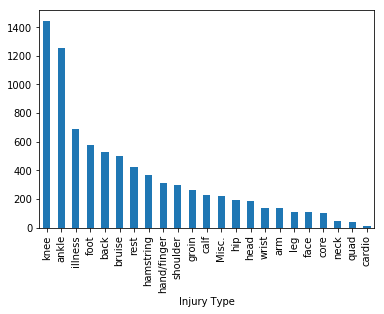

In [190]:
ax = injury_types['Notes'].sort_values(ascending=False).plot.bar()

In [191]:
# what are the misc. injuries?
misc_injuries = injury_data[injury_data['Injury Type']=='Misc.']
misc_injuries.head()

,Date,Team,Acquired,Relinquished,Notes,Injury Type
44,2010-11-08,Magic,NaN,Mickael Pietrus,DNP,Misc.
71,2010-11-17,Jazz,NaN,Kyrylo Fesenko,dizziness (DNP),Misc.
84,2010-11-22,Hornets,NaN,Marcus Thornton (T.),DNP,Misc.
394,2011-02-03,Bucks,NaN,Chris Douglas-Roberts,DNP,Misc.
479,2011-02-25,Blazers,NaN,Gerald Wallace,DNP,Misc.


In [192]:
# divide the injury data into separate data frames for each season

# 2010-2011
injury_data_10 = injury_data[(injury_data['Date'] < '2011-08-01') & (injury_data['Date'] > '2010-10-01')]

# 2011-2012
injury_data_11 = injury_data[(injury_data['Date'] < '2012-08-01') & (injury_data['Date'] > '2011-10-01')]

# 2012-2013
injury_data_12 = injury_data[(injury_data['Date'] < '2013-08-01') & (injury_data['Date'] > '2012-10-01')]

# 2013-2014
injury_data_13 = injury_data[(injury_data['Date'] < '2014-08-01') & (injury_data['Date'] > '2013-10-01')]

# 2014-2015
injury_data_14 = injury_data[(injury_data['Date'] < '2015-08-01') & (injury_data['Date'] > '2014-10-01')]

# 2015-2016
injury_data_15 = injury_data[(injury_data['Date'] < '2016-08-01') & (injury_data['Date'] > '2015-10-01')]

# 2016-2017
injury_data_16 = injury_data[(injury_data['Date'] < '2017-08-01') & (injury_data['Date'] > '2016-10-01')]

# 2017-2018
injury_data_17 = injury_data[(injury_data['Date'] < '2018-08-01') & (injury_data['Date'] > '2017-10-01')]

Total number of injuries:  824


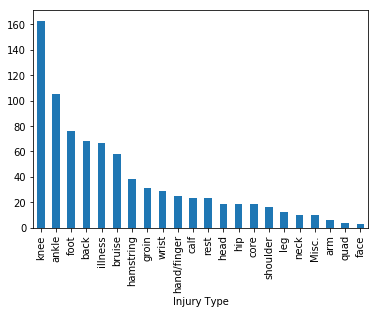

In [193]:
# injury types for 2010-2011 season - lockout year
injury_types_10 = injury_data_10.groupby('Injury Type').count()[['Notes']]
injury_types_10['Notes'].sort_values(ascending=False)

ax = injury_types_10['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_10))

Total number of injuries:  1352


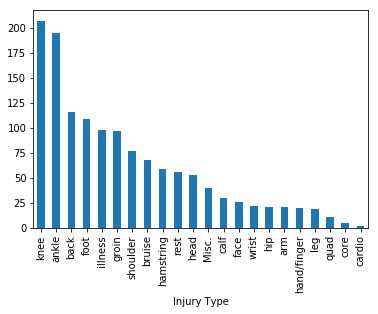

In [194]:
# injury types for 2011-2012 season
injury_types_11 = injury_data_11.groupby('Injury Type').count()[['Notes']]
injury_types_11['Notes'].sort_values(ascending=False)

ax = injury_types_11['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_11))

Total number of injuries:  1217


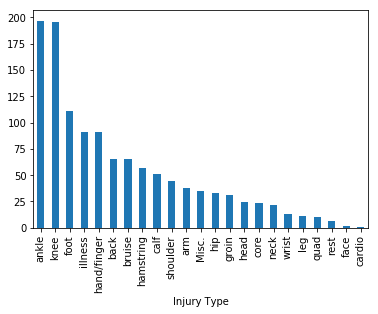

In [195]:
# injury types for 2012-2013 season
injury_types_12 = injury_data_12.groupby('Injury Type').count()[['Notes']]
injury_types_12['Notes'].sort_values(ascending=False)

ax = injury_types_12['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_12))

Total number of injuries:  1780


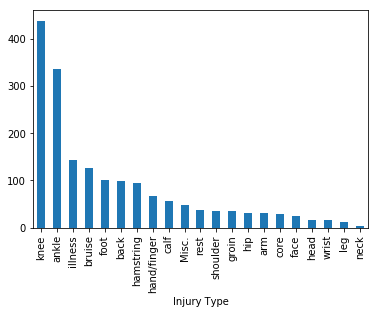

In [196]:
# injury types for 2013-2014 season
injury_types_13 = injury_data_13.groupby('Injury Type').count()[['Notes']]
injury_types_13['Notes'].sort_values(ascending=False)

ax = injury_types_13['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_13))

Total number of injuries:  666


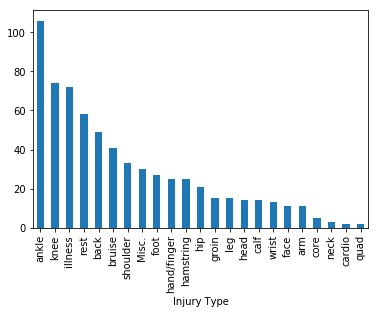

In [197]:
# injury types for 2014-2015 season
injury_types_14 = injury_data_14.groupby('Injury Type').count()[['Notes']]
injury_types_14['Notes'].sort_values(ascending=False)

ax = injury_types_14['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_14))

In [306]:
# injury_types_14

Total number of injuries:  809


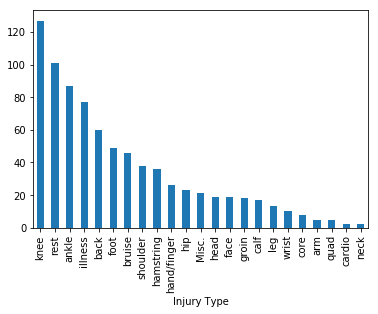

In [199]:
# injury types for 2015-2016 season
injury_types_15 = injury_data_15.groupby('Injury Type').count()[['Notes']]
injury_types_15['Notes'].sort_values(ascending=False)

ax = injury_types_15['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_15))

Total number of injuries:  842


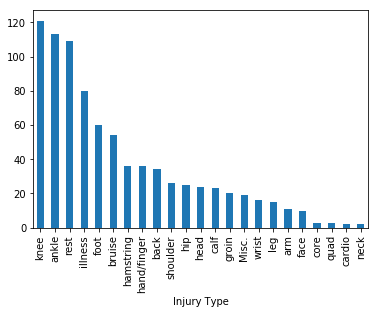

In [200]:
# injury types for 2016-2017 season
injury_types_16 = injury_data_16.groupby('Injury Type').count()[['Notes']]
injury_types_16['Notes'].sort_values(ascending=False)

ax = injury_types_16['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_16))

Total number of injuries:  644


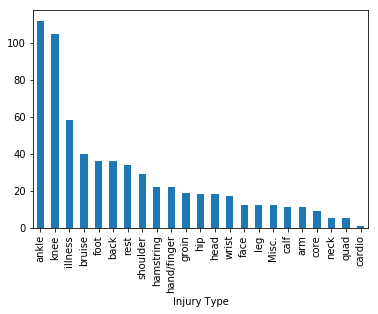

In [201]:
# injury types for the 2017-2018 season
injury_types_17 = injury_data_17.groupby('Injury Type').count()[['Notes']]
injury_types_17['Notes'].sort_values(ascending=False)

ax = injury_types_17['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_17))

In [202]:
# nba player per game statistics for each season
list_of_files = [f for f in listdir('nba_player_stats') if isfile(join('nba_player_stats', f))]
list_of_files

['2013-2014_nba_player_stats.txt',
 '2018-2019_nba_player_stats.txt',
 '2015-2016_nba_player_stats.txt',
 '2014-2015_nba_player_stats.txt',
 '2017-2018_nba_player_stats.txt',
 '2012-2013_nba_player_stats.txt',
 '2011-2012_nba_player_stats.txt',
 '2010-2011_nba_player_stats.txt',
 '2016-2017_nba_player_stats.txt']

In [203]:
# what types of players get what types of injuries

In [204]:
# does position / play style correlate with injury frequency? 

In [205]:
# read in the statistics from 17-18 NBA season
stats_17_18 = pd.read_csv('nba_player_stats/' + list_of_files[4])
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
stats_17_18.head()  # normalize data

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines\abrinal01,SG,24,OKC,75,8,15.1,1.5,3.9,0.395,1.1,2.9,0.380,0.4,0.9,0.443,0.540,0.5,0.6,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,2,Quincy Acy\acyqu01,PF,27,BRK,70,8,19.4,1.9,5.2,0.356,1.5,4.2,0.349,0.4,1.0,0.384,0.496,0.7,0.9,0.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,3,Steven Adams\adamsst01,C,24,OKC,76,76,32.7,5.9,9.4,0.629,0.0,0.0,0.000,5.9,9.3,0.631,0.629,2.1,3.8,0.559,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,4,Bam Adebayo\adebaba01,C,20,MIA,69,19,19.8,2.5,4.9,0.512,0.0,0.1,0.000,2.5,4.8,0.523,0.512,1.9,2.6,0.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,5,Arron Afflalo\afflaar01,SG,32,ORL,53,3,12.9,1.2,3.1,0.401,0.5,1.3,0.386,0.7,1.7,0.413,0.485,0.4,0.5,0.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4


In [206]:
ex = stats_17_18['Player'][0]
regname = r".*?(?=\\)"  # use regular expression to extract player name 
names = re.findall(regname, ex)
names[0]

'Álex Abrines'

In [207]:
# use regex to normalize player names 
stats_17_18['Player'] = stats_17_18['Player'].apply(lambda x: (re.findall(regname,x))[0] ) 
stats_17_18.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,0.395,1.1,2.9,0.380,0.4,0.9,0.443,0.540,0.5,0.6,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,2,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,0.356,1.5,4.2,0.349,0.4,1.0,0.384,0.496,0.7,0.9,0.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,3,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,0.629,0.0,0.0,0.000,5.9,9.3,0.631,0.629,2.1,3.8,0.559,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,0.512,0.0,0.1,0.000,2.5,4.8,0.523,0.512,1.9,2.6,0.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,5,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,0.401,0.5,1.3,0.386,0.7,1.7,0.413,0.485,0.4,0.5,0.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4


In [208]:
# drop columns with percentages, which are not needed
stats_17_18 = stats_17_18.drop(columns=["Rk","FG%","3P%","2P%","eFG%","FT%"])
stats_17_18.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,1.1,2.9,0.4,0.9,0.5,0.6,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,1.5,4.2,0.4,1.0,0.7,0.9,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,0.0,0.0,5.9,9.3,2.1,3.8,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,0.0,0.1,2.5,4.8,1.9,2.6,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,0.5,1.3,0.7,1.7,0.4,0.5,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4


In [209]:
#stats["Player"].apply(lambda x: print(x)) #check for duplicates

In [284]:
# player search
query_str = 'Player == "Rajon Rondo"'
playerx = stats_17_18.query(query_str)
playerx = playerx.iloc[0,:]
playerx

Player    Rajon Rondo
Pos                PG
Age                31
Tm                NOP
G                  65
GS                 63
MP               26.2
FG                3.6
FGA               7.6
3P                0.8
3PA               2.3
2P                2.8
2PA               5.3
FT                0.4
FTA               0.7
ORB               0.5
DRB               3.6
TRB                 4
AST               8.2
STL               1.1
BLK               0.2
TOV               2.3
PF                1.8
PTS               8.3
OAG          0.223282
DAG          0.374046
Name: 422, dtype: object

In [211]:
# remove duplicate rows, averaged into TOT 
stats_17_18 = stats_17_18.groupby("Player").apply(lambda x: x.iloc[0]).reset_index(drop=True) 
stats_17_18.groupby("Player").size().max() # check for duplicate names

1

In [212]:
stats_17_18.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Aaron Brooks,PG,33,MIN,32,1,5.9,0.9,2.2,0.3,1.0,0.5,1.2,0.3,0.3,0.2,0.3,0.5,0.6,0.2,0.0,0.3,0.9,2.3
1,Aaron Gordon,PF,22,ORL,58,57,32.9,6.5,14.9,2.0,5.9,4.5,9.0,2.7,3.9,1.5,6.4,7.9,2.3,1.0,0.8,1.8,1.9,17.6
2,Aaron Harrison,SG,23,DAL,9,3,25.9,2.1,7.7,1.0,4.8,1.1,2.9,1.4,1.9,0.4,2.2,2.7,1.2,1.0,0.2,0.3,3.0,6.7
3,Aaron Jackson,PG,31,HOU,1,0,35.0,3.0,9.0,1.0,4.0,2.0,5.0,1.0,2.0,2.0,1.0,3.0,1.0,0.0,0.0,1.0,4.0,8.0
4,Abdel Nader,SF,24,BOS,48,1,10.9,1.0,3.1,0.5,1.4,0.6,1.8,0.5,0.8,0.3,1.2,1.5,0.5,0.3,0.2,0.7,0.9,3.0


In [213]:
# stats = stats[(stats.MP > 4)] # remove players who play less than 4 minutes per game
# stats

In [214]:
#agression metric
#defensive : MP, DRB, STL, BLK, PF
#offensive : MP, FGA, FTA, ORB, AST

drb = 1
stl = 2
blk = 2 
pf = 2

ad = stats_17_18.sort_values(by="BLK", ascending = False).iloc[0] # check DAG metric with Anthony Davis statistics, top defender
num = ad.DRB*drb + ad.STL*stl + ad.BLK*blk + ad.PF*pf
print("Anthony Davis defensive agression: ", num)







Anthony Davis defensive agression:  21.0


In [215]:
stats_17_18.sort_values(by="FGA", ascending = False) # sort by field goals attempted, should have high OAG

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
443,Russell Westbrook,PG,29,OKC,80,80,36.4,9.5,21.1,1.2,4.1,8.3,17.0,5.2,7.1,1.9,8.2,10.1,10.3,1.8,0.3,4.8,2.5,25.4
217,James Harden,SG,28,HOU,72,72,35.4,9.0,20.1,3.7,10.0,5.4,10.1,8.7,10.1,0.6,4.8,5.4,8.8,1.8,0.7,4.4,2.3,30.4
28,Anthony Davis,PF,24,NOP,75,75,36.4,10.4,19.5,0.7,2.2,9.7,17.3,6.6,8.0,2.5,8.6,11.1,2.3,1.5,2.6,2.2,2.1,28.1
125,Devin Booker,SG,21,PHO,54,54,34.5,8.4,19.5,2.7,7.1,5.7,12.4,5.4,6.1,0.5,4.0,4.5,4.7,0.9,0.3,3.6,3.1,24.9
86,Damian Lillard,PG,27,POR,73,73,36.6,8.5,19.4,3.1,8.6,5.4,10.8,6.8,7.4,0.8,3.6,4.5,6.6,1.1,0.4,2.8,1.6,26.9
324,LeBron James,PF,33,CLE,82,82,36.9,10.5,19.3,1.8,5.0,8.6,14.3,4.7,6.5,1.2,7.5,8.6,9.1,1.4,0.9,4.2,1.7,27.5
173,Giannis Antetokounmpo,PF,23,MIL,75,75,36.7,9.9,18.7,0.6,1.9,9.3,16.8,6.5,8.5,2.1,8.0,10.0,4.8,1.5,1.4,3.0,3.1,26.9
60,CJ McCollum,SG,26,POR,81,81,36.1,8.2,18.6,2.3,5.9,5.9,12.7,2.6,3.1,0.7,3.3,4.0,3.4,1.0,0.4,1.9,2.1,21.4
308,Kristaps Porziņģis,PF,22,NYK,48,48,32.4,8.1,18.5,1.9,4.8,6.3,13.8,4.5,5.7,1.3,5.3,6.6,1.2,0.8,2.4,1.9,2.9,22.7
47,Bradley Beal,SG,24,WAS,82,82,36.3,8.3,18.1,2.4,6.5,5.9,11.6,3.6,4.5,0.7,3.7,4.4,4.5,1.2,0.4,2.6,2.0,22.6


In [216]:
# check Offensive Aggression metric with Russ Westbrook
fga = .5
fta = 1.5
orb = 2
ast = 0

russ = stats_17_18.sort_values(by="FGA", ascending = False).iloc[0]
num = russ.FGA*fga + russ.FTA*fta + russ.AST*ast + russ.ORB*orb 
print("Russel Westbrook offensive agression: ", num)


Russel Westbrook offensive agression:  25.0


In [217]:
stats_17_18["OAG"] = (stats_17_18.FGA*fga + stats_17_18.FTA*fta + stats_17_18.AST*ast + stats_17_18.ORB*orb)/stats_17_18.MP # add column for offensive agression metric
stats_17_18["DAG"] = (stats_17_18.DRB*drb + stats_17_18.STL*stl + stats_17_18.BLK*blk + stats_17_18.PF*pf)/stats_17_18.MP # add column for defensive agression metric 
stats_17_18 = stats_17_18[(stats_17_18.MP >15) & (stats_17_18.G > 5)]  # filter out players who have low usage 

In [218]:
# 2017-2018 season player stats with OAG and DAG -- guards only and sorted by DAG 
stats_17_18[(stats_17_18['Pos']=='SG') | (stats_17_18['Pos']=='PG')].sort_values(by="DAG", ascending = False)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,OAG,DAG
307,Kris Dunn,PG,23,CHI,52,43,29.3,5.5,12.8,0.8,2.6,4.7,10.2,1.6,2.2,0.5,3.8,4.3,6.0,2.0,0.5,2.9,3.3,13.4,0.365188,0.525597
113,Dejounte Murray,PG,21,SAS,81,48,21.5,3.3,7.5,0.1,0.4,3.2,7.1,1.3,1.8,1.4,4.3,5.7,2.9,1.2,0.4,1.7,1.9,8.1,0.430233,0.525581
455,Shaquille Harrison,PG,24,PHO,23,2,16.7,2.6,5.4,0.3,1.1,2.3,4.3,1.2,1.7,0.4,2.3,2.7,2.4,1.1,0.3,1.0,1.8,6.6,0.362275,0.520958
370,Michael Carter-Williams,PG,26,CHO,52,2,16.1,1.5,4.4,0.3,1.1,1.2,3.3,1.4,1.7,0.7,1.9,2.7,2.2,0.8,0.4,1.0,1.9,4.6,0.381988,0.503106
39,Ben Simmons,PG,21,PHI,81,81,33.7,6.7,12.3,0.0,0.1,6.7,12.2,2.4,4.2,1.8,6.3,8.1,8.2,1.7,0.9,3.4,2.6,15.8,0.476261,0.495549
352,Mario Chalmers,PG,31,MEM,66,10,21.5,2.5,6.7,0.8,2.9,1.7,3.8,1.8,2.1,0.2,2.2,2.4,3.0,1.2,0.2,1.8,2.7,7.7,0.320930,0.483721
443,Russell Westbrook,PG,29,OKC,80,80,36.4,9.5,21.1,1.2,4.1,8.3,17.0,5.2,7.1,1.9,8.2,10.1,10.3,1.8,0.3,4.8,2.5,25.4,0.686813,0.478022
318,Lance Stephenson,SG,27,IND,82,7,22.6,3.7,8.6,0.8,2.8,2.9,5.8,1.0,1.5,0.8,4.4,5.2,2.9,0.6,0.2,1.6,2.2,9.2,0.360619,0.460177
514,Victor Oladipo,SG,25,IND,75,75,34.0,8.5,17.9,2.1,5.8,6.4,12.1,3.9,4.9,0.6,4.6,5.2,4.3,2.4,0.8,2.9,2.3,23.1,0.514706,0.458824
230,Jawun Evans,PG,21,LAC,48,4,16.2,1.9,5.3,0.3,1.1,1.5,4.1,0.8,1.0,0.2,1.6,1.8,2.1,0.8,0.1,0.9,2.0,4.8,0.280864,0.456790


In [219]:
# 2017-2018 season player stats with OAG and DAG -- guards only and sorted by OAG 
guards_17_18 = stats_17_18[(stats_17_18['Pos']=='SG') | (stats_17_18['Pos']=='PG')].sort_values(by="OAG", ascending = False)
guards_17_18

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,OAG,DAG
217,James Harden,SG,28,HOU,72,72,35.4,9.0,20.1,3.7,10.0,5.4,10.1,8.7,10.1,0.6,4.8,5.4,8.8,1.8,0.7,4.4,2.3,30.4,0.745763,0.406780
443,Russell Westbrook,PG,29,OKC,80,80,36.4,9.5,21.1,1.2,4.1,8.3,17.0,5.2,7.1,1.9,8.2,10.1,10.3,1.8,0.3,4.8,2.5,25.4,0.686813,0.478022
110,DeMar DeRozan,SG,28,TOR,80,80,33.9,8.1,17.7,1.1,3.6,7.0,14.1,5.8,7.0,0.7,3.2,3.9,5.2,1.1,0.3,2.2,1.9,23.0,0.612094,0.289086
86,Damian Lillard,PG,27,POR,73,73,36.6,8.5,19.4,3.1,8.6,5.4,10.8,6.8,7.4,0.8,3.6,4.5,6.6,1.1,0.4,2.8,1.6,26.9,0.612022,0.267760
463,Stephen Curry,PG,29,GSW,51,51,32.0,8.4,16.9,4.2,9.8,4.2,7.1,5.5,5.9,0.7,4.4,5.1,6.1,1.6,0.2,3.0,2.2,26.4,0.584375,0.387500
243,Jimmy Butler,SG,28,MIN,59,59,36.7,7.4,15.6,1.2,3.4,6.2,12.2,6.2,7.2,1.3,4.0,5.3,4.9,2.0,0.4,1.8,1.3,22.2,0.577657,0.310627
125,Devin Booker,SG,21,PHO,54,54,34.5,8.4,19.5,2.7,7.1,5.7,12.4,5.4,6.1,0.5,4.0,4.5,4.7,0.9,0.3,3.6,3.1,24.9,0.576812,0.365217
328,Lou Williams,SG,31,LAC,79,19,32.8,7.4,16.9,2.4,6.6,5.0,10.4,5.5,6.2,0.5,2.0,2.5,5.3,1.1,0.2,3.0,1.3,22.6,0.571646,0.219512
534,Zach LaVine,SG,22,CHI,24,24,27.3,5.7,14.8,1.8,5.1,3.9,9.7,3.6,4.5,0.4,3.5,3.9,3.0,1.0,0.2,1.8,2.3,16.7,0.547619,0.384615
344,MarShon Brooks,SG,29,MEM,7,1,27.6,7.3,14.6,2.7,4.6,4.6,10.0,2.9,3.3,1.1,1.9,3.0,3.6,1.6,0.4,2.3,0.9,20.1,0.523551,0.278986


In [220]:
# 2017-2018 season player stats with OAG and DAG -- bigs only and sorted by DAG 
stats_17_18[(stats_17_18['Pos']=='SF') | (stats_17_18['Pos']=='PF') | (stats_17_18['Pos']=='C')].sort_values(by="DAG", ascending = False)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,OAG,DAG
314,Kyle O'Quinn,C,27,NYK,77,10,18.0,2.9,5.0,0.1,0.2,2.9,4.8,1.3,1.6,1.6,4.5,6.1,2.1,0.5,1.3,1.3,2.5,7.1,0.450000,0.727778
389,Nerlens Noel,C,23,DAL,30,6,15.7,1.8,3.5,0.0,0.0,1.8,3.5,0.7,0.9,1.6,4.0,5.6,0.7,1.0,0.7,0.9,2.0,4.4,0.401274,0.726115
181,Hassan Whiteside,C,28,MIA,54,54,25.3,5.8,10.7,0.0,0.0,5.7,10.7,2.4,3.4,3.2,8.2,11.4,1.0,0.7,1.7,1.7,2.4,14.0,0.666008,0.703557
18,Andre Drummond,C,24,DET,78,78,33.7,6.0,11.3,0.0,0.1,6.0,11.2,3.1,5.1,5.1,10.9,16.0,3.0,1.5,1.6,2.6,3.2,15.0,0.697329,0.697329
111,DeMarcus Cousins,C,27,NOP,48,48,36.2,8.5,18.0,2.2,6.1,6.3,11.9,6.1,8.2,2.2,10.7,12.9,5.4,1.6,1.6,5.0,3.8,25.2,0.709945,0.682320
251,Joel Embiid,C,23,PHI,63,63,30.3,8.1,16.8,1.0,3.4,7.0,13.4,5.7,7.4,2.3,8.7,11.0,3.2,0.6,1.8,3.7,3.3,22.9,0.795380,0.663366
17,Amir Johnson,C,30,PHI,74,18,15.8,1.9,3.5,0.1,0.4,1.8,3.1,0.7,1.1,1.7,2.8,4.5,1.6,0.6,0.6,0.7,2.6,4.6,0.430380,0.658228
141,Dwight Howard,C,32,CHO,81,81,30.4,6.2,11.2,0.0,0.1,6.2,11.2,4.1,7.2,3.1,9.3,12.5,1.3,0.6,1.6,2.6,3.1,16.6,0.743421,0.654605
74,Clint Capela,C,23,HOU,74,74,27.5,6.0,9.1,0.0,0.0,6.0,9.1,1.9,3.5,3.3,7.6,10.8,0.9,0.8,1.9,1.4,2.5,13.9,0.596364,0.654545
287,Jusuf Nurkić,C,23,POR,79,79,26.4,6.1,12.0,0.0,0.1,6.1,11.9,2.2,3.5,2.4,6.6,9.0,1.8,0.8,1.4,2.3,3.1,14.3,0.607955,0.651515


In [221]:
# 2017-2018 season player stats with OAG and DAG -- bigs only and sorted by OAG 
bigs_17_18 = stats_17_18[(stats_17_18['Pos']=='SF') | (stats_17_18['Pos']=='PF') | (stats_17_18['Pos']=='C')].sort_values(by="OAG", ascending = False)
bigs_17_18

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,OAG,DAG
251,Joel Embiid,C,23,PHI,63,63,30.3,8.1,16.8,1.0,3.4,7.0,13.4,5.7,7.4,2.3,8.7,11.0,3.2,0.6,1.8,3.7,3.3,22.9,0.795380,0.663366
141,Dwight Howard,C,32,CHO,81,81,30.4,6.2,11.2,0.0,0.1,6.2,11.2,4.1,7.2,3.1,9.3,12.5,1.3,0.6,1.6,2.6,3.1,16.6,0.743421,0.654605
28,Anthony Davis,PF,24,NOP,75,75,36.4,10.4,19.5,0.7,2.2,9.7,17.3,6.6,8.0,2.5,8.6,11.1,2.3,1.5,2.6,2.2,2.1,28.1,0.734890,0.576923
173,Giannis Antetokounmpo,PF,23,MIL,75,75,36.7,9.9,18.7,0.6,1.9,9.3,16.8,6.5,8.5,2.1,8.0,10.0,4.8,1.5,1.4,3.0,3.1,26.9,0.716621,0.544959
111,DeMarcus Cousins,C,27,NOP,48,48,36.2,8.5,18.0,2.2,6.1,6.3,11.9,6.1,8.2,2.2,10.7,12.9,5.4,1.6,1.6,5.0,3.8,25.2,0.709945,0.682320
317,LaMarcus Aldridge,C,32,SAS,75,75,33.5,9.2,18.0,0.4,1.2,8.8,16.7,4.5,5.3,3.3,5.2,8.5,2.0,0.6,1.2,1.5,2.1,23.1,0.702985,0.388060
18,Andre Drummond,C,24,DET,78,78,33.7,6.0,11.3,0.0,0.1,6.0,11.2,3.1,5.1,5.1,10.9,16.0,3.0,1.5,1.6,2.6,3.2,15.0,0.697329,0.697329
181,Hassan Whiteside,C,28,MIA,54,54,25.3,5.8,10.7,0.0,0.0,5.7,10.7,2.4,3.4,3.2,8.2,11.4,1.0,0.7,1.7,1.7,2.4,14.0,0.666008,0.703557
280,Julius Randle,C,23,LAL,82,49,26.7,6.1,11.0,0.1,0.5,6.0,10.5,3.7,5.2,2.2,5.8,8.0,2.6,0.5,0.5,2.6,3.3,16.1,0.662921,0.539326
152,Enes Kanter,C,25,NYK,71,71,25.8,5.9,10.0,0.0,0.0,5.9,10.0,2.2,2.6,3.8,7.1,11.0,1.5,0.5,0.5,1.7,2.6,14.1,0.639535,0.554264


In [222]:
# guards only
print("Guards only:")
print("Average Defensive Agression: ", guards_17_18["DAG"].mean(axis=0))
print("Q1 quantile of DAG : ", np.quantile(guards_17_18["DAG"], .25))
print("Q2 quantile of DAG : ", np.quantile(guards_17_18["DAG"], .50))  
print("Q3 quantile of DAG : ", np.quantile(guards_17_18["DAG"], .75))
print("Q4 quantile of DAG : ", np.quantile(guards_17_18["DAG"], 1))
print("Average Offensive Aggresion: ", guards_17_18["OAG"].mean(axis=0))
print("Q1 quantile of OAG : ", np.quantile(guards_17_18["OAG"], .25))
print("Q2 quantile of OAG : ", np.quantile(guards_17_18["OAG"], .50))
print("Q3 quantile of OAG : ", np.quantile(guards_17_18["OAG"], .75))
print("Q4 quantile of OAG : ", np.quantile(guards_17_18["OAG"], 1))
print("")
print("Bigs only:")
print("Average Defensive Agression: ", bigs_17_18["DAG"].mean(axis=0))
print("Q1 quantile of DAG : ", np.quantile(bigs_17_18["DAG"], .25))
print("Q2 quantile of DAG : ", np.quantile(bigs_17_18["DAG"], .50))  
print("Q3 quantile of DAG : ", np.quantile(bigs_17_18["DAG"], .75))
print("Q4 quantile of DAG : ", np.quantile(bigs_17_18["DAG"], 1))
print("Average Offensive Agression: ", bigs_17_18["OAG"].mean(axis=0))
print("Q1 quantile of OAG : ", np.quantile(bigs_17_18["OAG"], .25)) 
print("Q2 quantile of OAG : ", np.quantile(bigs_17_18["OAG"], .50)) 
print("Q3 quantile of OAG : ", np.quantile(bigs_17_18["OAG"], .75))
print("Q4 quantile of DAG : ", np.quantile(bigs_17_18["OAG"], 1))

Guards only:
Average Defensive Agression:  0.34189644630817423
Q1 quantile of DAG :  0.2940923948244438
Q2 quantile of DAG :  0.3333333333333333
Q3 quantile of DAG :  0.38436067244014266
Q4 quantile of DAG :  0.5255972696245734
Average Offensive Aggresion:  0.3512810718314373
Q1 quantile of OAG :  0.27008965494425513
Q2 quantile of OAG :  0.34
Q3 quantile of OAG :  0.4176829268292683
Q4 quantile of OAG :  0.7457627118644068

Bigs only:
Average Defensive Agression:  0.4597877167355166
Q1 quantile of DAG :  0.37941176470588234
Q2 quantile of DAG :  0.45748987854251016
Q3 quantile of DAG :  0.5269461077844312
Q4 quantile of DAG :  0.7277777777777777
Average Offensive Agression:  0.41104909481561397
Q1 quantile of OAG :  0.3096774193548387
Q2 quantile of OAG :  0.40710382513661203
Q3 quantile of OAG :  0.49275362318840576
Q4 quantile of DAG :  0.7953795379537955


Text(0.5, 0, 'DAG')

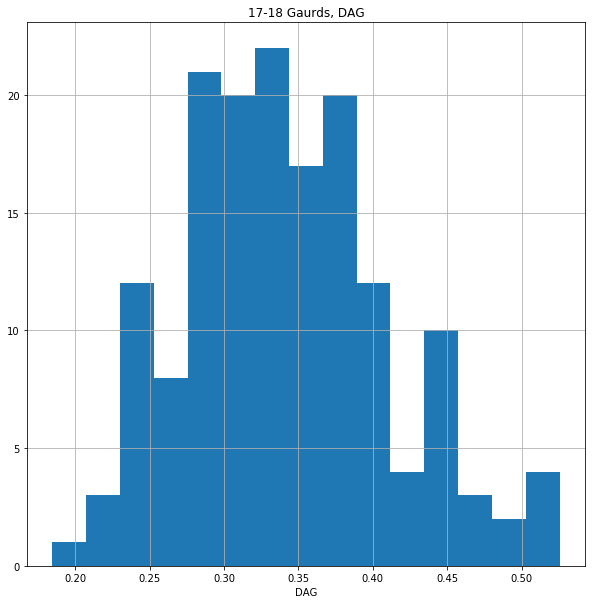

In [266]:
# distribution for guards DAG
plt.figure(figsize=(10,10))
guards_17_18.DAG.hist(bins= 15)
plt.title('17-18 Gaurds, DAG')
plt.xlabel('DAG')

Text(0.5, 0, 'OAG')

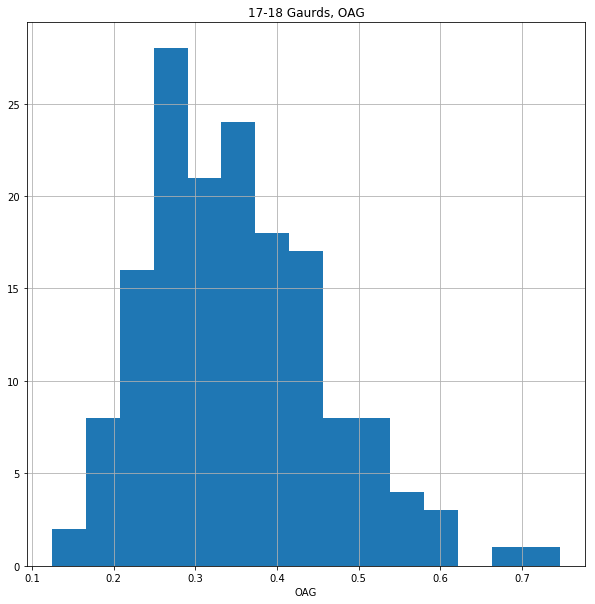

In [268]:
# distribution for guards OAG
plt.figure(figsize=(10,10))

guards_17_18.OAG.hist(bins= 15)
plt.title('17-18 Gaurds, OAG')
plt.xlabel('OAG')

Text(0.5, 0, 'DAG')

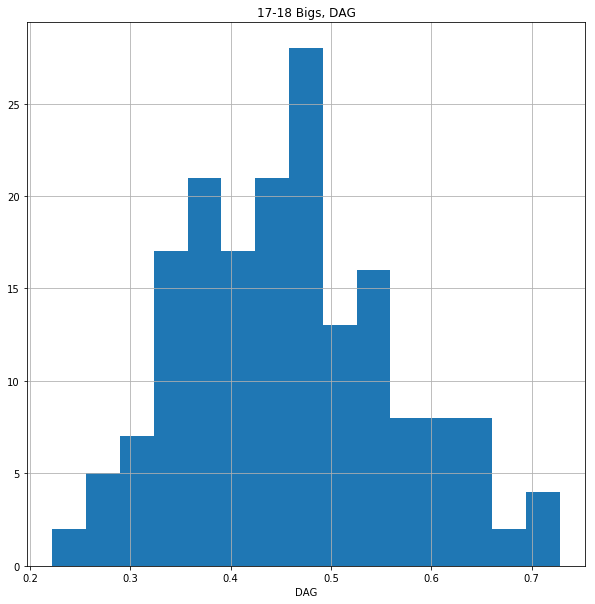

In [269]:
# distribution for bigs DAG
plt.figure(figsize=(10,10))
plt.title('17-18 Bigs, DAG')


bigs_17_18.DAG.hist(bins=15)
plt.xlabel('DAG')

Text(0.5, 0, 'OAG')

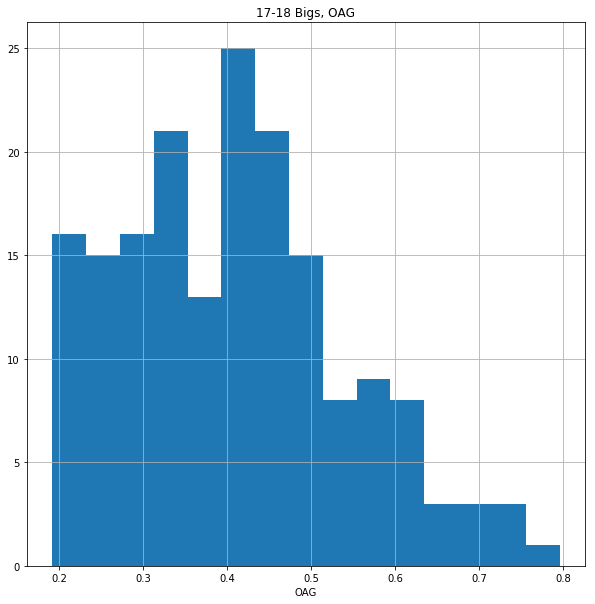

In [270]:
# distribution for bigs OAG
plt.figure(figsize=(10,10))
plt.title('17-18 Bigs, OAG')


bigs_17_18.OAG.hist(bins= 15)
plt.xlabel('OAG')

In [227]:
# plt.scatter(stats_17_18.MP.head(100), stats_17_18.OAG.head(100))

In [228]:
# plt.scatter(stats_17_18.MP.head(100), stats_17_18.DAG.head(100))

In [229]:
injury_data_17.head()

,Date,Team,Acquired,Relinquished,Notes,Injury Type
8850,2017-10-05,Blazers,NaN,Noah Vonleh,strained right shoulder (DTD),shoulder
8851,2017-10-05,Hornets,NaN,Nicolas Batum,torn ligament in left elbow (out indefinitely),arm
8852,2017-10-06,Kings,NaN,Harry Giles,recovering from surgery / rehab of knees,knee
8853,2017-10-07,Bulls,NaN,Kris Dunn,dislocated left index finger (out indefinitely),hand/finger
8854,2017-10-07,Jazz,NaN,Dante Exum,separated left shoulder (out indefinitely),shoulder


In [230]:
# combine stats data and injury datasets to make column for number of times injured during that season

injstats_17_18 = pd.merge(stats_17_18, injury_data_17, how="inner", left_on="Player", right_on="Relinquished", indicator = True )
df = pd.DataFrame({"INJ":injstats_17_18.groupby("Player").size()})
superstats_17_18 = pd.merge(stats_17_18, df, how="left", left_on="Player", right_on="Player")
superstats_17_18 = superstats_17_18.fillna(0)

onlyinj = superstats_17_18[(superstats_17_18.INJ > 1)]
noinj = superstats_17_18[(superstats_17_18.INJ <= 1)]

104
55


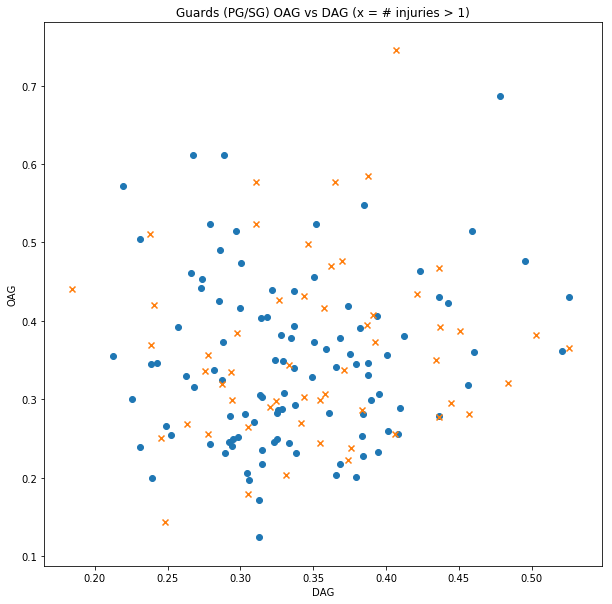

In [271]:
# guards only 
no_inj_g = noinj[(noinj.Pos == "SG") | (noinj.Pos == "PG")]
inj_g = onlyinj[(onlyinj.Pos == "SG") | (onlyinj.Pos == "PG")]

plt.figure(figsize=(10,10))
plt.scatter(no_inj_g.DAG,no_inj_g.OAG)
plt.scatter(inj_g.DAG,inj_g.OAG, marker='x')
plt.title("Guards (PG/SG) OAG vs DAG (x = # injuries > 1)")
plt.xlabel("DAG")
plt.ylabel("OAG")

print(no_inj_g.Player.size)
print(inj_g.Player.size)

117
60


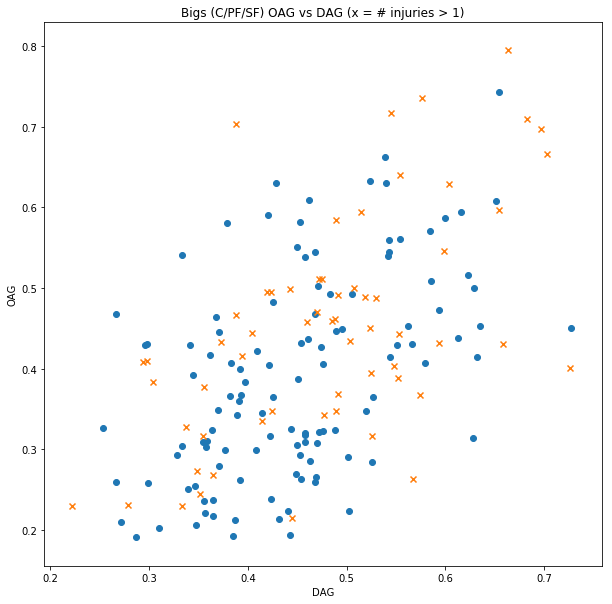

In [272]:
# bigs only 
no_inj_b = noinj[(noinj.Pos == "SF") | (noinj.Pos == "PF") | (noinj.Pos == "C")]
inj_b = onlyinj[(onlyinj.Pos == "SF") | (onlyinj.Pos == "PF") | (onlyinj.Pos == "C")]

plt.figure(figsize=(10,10))
plt.scatter(no_inj_b.DAG,no_inj_b.OAG)
plt.scatter(inj_b.DAG,inj_b.OAG,marker='x')
plt.title("Bigs (C/PF/SF) OAG vs DAG (x = # injuries > 1)")
plt.xlabel("DAG")
plt.ylabel("OAG")

print(no_inj_b.Player.size)
print(inj_b.Player.size)

In [274]:
# guards -- lower 1/2 quantile bucket
gQ1_noInj_bucket = no_inj_g[(no_inj_g['DAG'] <= 0.3339328537170264) & (no_inj_g['OAG'] <= 0.3406730769230769)]
gQ1_onlyInj_bucket = inj_g[(inj_g['DAG'] <= 0.3339328537170264) & (inj_g['OAG'] <= 0.3406730769230769)]
# gQ1_onlyInj_bucket.count()[0]
print("fraction of guards injured in the lower 1/2 quantile bucket: ", gQ1_onlyInj_bucket.count()[0]/gQ1_noInj_bucket.count()[0])

fraction of guards injured in the lower 1/2 quantile bucket:  0.3939393939393939


In [273]:
# guards -- upper 1/2 quantile bucket
gQ2_noInj_bucket = no_inj_g[(no_inj_g['DAG'] > 0.3339328537170264) & (no_inj_g['OAG'] > 0.3406730769230769)]
gQ2_onlyInj_bucket = inj_g[(inj_g['DAG'] > 0.3339328537170264) & (inj_g['OAG'] > 0.3406730769230769)]
# gQ1_onlyInj_bucket.count()[0]
print("fraction of guards injured in the upper 1/2 quantile bucket: ", gQ2_onlyInj_bucket.count()[0]/gQ2_noInj_bucket.count()[0])

fraction of guards injured in the upper 1/2 quantile bucket:  0.6666666666666666


In [235]:
# bigs -- lower 1/2 quantile bucket
bQ1_noInj_bucket = no_inj_b[(no_inj_b['DAG'] <= 0.4574683435265742) & (no_inj_b['OAG'] <= 0.407458162568306)]
bQ1_onlyInj_bucket = inj_b[(inj_b['DAG'] <= 0.4574683435265742) & (inj_b['OAG'] <= 0.407458162568306)]
# gQ1_onlyInj_bucket.count()[0]
print("fraction of bigs injured in the lower 1/2 quantile bucket: ", bQ1_onlyInj_bucket.count()[0]/bQ1_noInj_bucket.count()[0])

fraction of bigs injured in the lower 1/2 quantile bucket:  0.2708333333333333


In [236]:
# bigs -- upper 1/2 quantile bucket
bQ1_noInj_bucket = no_inj_b[(no_inj_b['DAG'] > 0.4574683435265742) & (no_inj_b['OAG'] > 0.407458162568306)]
bQ1_onlyInj_bucket = inj_b[(inj_b['DAG'] > 0.4574683435265742) & (inj_b['OAG'] > 0.407458162568306)]
# gQ1_onlyInj_bucket.count()[0]
print("fraction of bigs injured in the upper 1/2 quantile bucket: ", bQ1_onlyInj_bucket.count()[0]/bQ1_noInj_bucket.count()[0])

fraction of bigs injured in the upper 1/2 quantile bucket:  0.7941176470588235


In [289]:
superstats_17_18[superstats_17_18['Player']=='DeMarcus Cousins'][['Player','OAG','DAG']]

,Player,OAG,DAG
64,DeMarcus Cousins,0.709945,0.68232


In [293]:
guards_17_18.sort_values(by='DAG',ascending=False)[['Player','DAG']].head(5)

,Player,DAG
307,Kris Dunn,0.525597
113,Dejounte Murray,0.525581
455,Shaquille Harrison,0.520958
370,Michael Carter-Williams,0.503106
39,Ben Simmons,0.495549


In [295]:
guards_17_18.sort_values(by='OAG',ascending=False)[['Player','OAG']].head(5)

,Player,OAG
217,James Harden,0.745763
443,Russell Westbrook,0.686813
110,DeMar DeRozan,0.612094
86,Damian Lillard,0.612022
463,Stephen Curry,0.584375


In [296]:
bigs_17_18.sort_values(by='DAG',ascending=False)[['Player','DAG']].head(5)

,Player,DAG
314,Kyle O'Quinn,0.727778
389,Nerlens Noel,0.726115
181,Hassan Whiteside,0.703557
18,Andre Drummond,0.697329
111,DeMarcus Cousins,0.682320


In [297]:
bigs_17_18.sort_values(by='OAG',ascending=False)[['Player','OAG']].head(5)

,Player,OAG
251,Joel Embiid,0.795380
141,Dwight Howard,0.743421
28,Anthony Davis,0.734890
173,Giannis Antetokounmpo,0.716621
111,DeMarcus Cousins,0.709945


In [237]:
# !unzip -o nba-2018-19.zip -d shotchart

In [238]:
# filecount = !ls -1 ./shotchart/shotchartdetail\?PlayerID=* \
# | cut -d '&' -f 1 \
# | cut -d '?' -f 2 \
# | sort -n \
# | uniq \
# | wc -l
# filecount


In [239]:
# uniqueshotfiles = !ls -1 ./shotchart/shotchartdetail\?PlayerID=* \
# | cut -d '&' -f 1 \
# | cut -d '?' -f 2 \
# | sort -n \
# | uniq \

# uniqueshotfiles

In [240]:
# %matplotlib inline

# import pandas as pd
# import numpy as np
# import json

# json_str = !cat shotchart/commonTeamYears\?LeagueID\=00\&Season\=2018-19
# json_obj = json.loads(json_str[0])
# #print(json_obj.keys())

# h = json_obj['resultSets'][0]['headers']
# d = json_obj['resultSets'][0]['rowSet']
# allteams = pd.DataFrame(d,columns =h )

In [241]:
# %matplotlib inline

# import pandas as pd
# import numpy as np
# import json

# json_str = !cat shotchart/commonTeamYears\?LeagueID\=00\&Season\=2018-19
# json_obj = json.loads(json_str[0])
# #print(json_obj.keys())

# h = json_obj['resultSets'][0]['headers']
# d = json_obj['resultSets'][0]['rowSet']
# allteams = pd.DataFrame(d,columns =h )

In [242]:
# json_str = !cat shotchart/commonallplayers\?LeagueID\=00\&Season\=2018-19\&IsOnlyCurrentSeason\=0
# json_obj = json.loads(json_str[0])
# #print(json_obj1.keys())

# h = json_obj['resultSets'][0]['headers']
# d = json_obj['resultSets'][0]['rowSet']
# allplayers = pd.DataFrame(d,columns =h ).set_index('PERSON_ID')
# allplayers

In [243]:
# allshotslist = []

# files = !ls -1 shotchart/shotchartdetail*
# for f in files:
#     json_str = !cat '{f}'
#     json_obj = json.loads(json_str[0])
#     h = json_obj['resultSets'][0]['headers']
#     d = json_obj['resultSets'][0]['rowSet']
#     allshotslist.append(pd.DataFrame(d,columns =h ))
    
# allshots = pd.concat(allshotslist)

In [244]:
#allshots

In [245]:
# ##query data for specific players
# query_str = 'DISPLAY_FIRST_LAST == "Stephen Curry"'
# curry_id = allplayers.query(query_str).index[0]

# curry_data = allshots.query('PLAYER_NAME == "Stephen Curry"').astype({'SHOT_MADE_FLAG':'int'})

In [246]:
# #field goal percentage table
# FGpercent_table = pd.pivot_table(curry_data, values = 'SHOT_MADE_FLAG', index = "PERIOD", columns = ["SHOT_ZONE_RANGE", "SHOT_ZONE_AREA"], fill_value = 0 )
# FGpercent_table



In [247]:
# #draw basketball court
# def draw_court(ax=None, color='black', lw=1, outer_lines=False):
    
#     from matplotlib.patches import Circle, Rectangle, Arc
#     from matplotlib.pyplot import gca
    
#     # If an axes object isn't provided to plot onto, just get current one
#     if ax is None:
#         ax = gca()

#     # Create the various parts of an NBA basketball court

#     # Create the basketball hoop
#     # Diameter of a hoop is 18" so it has a radius of 9", which is a value
#     # 7.5 in our coordinate system
#     hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

#     # Create backboard
#     backboard = Rectangle((-30, -7.5), 60, 0, linewidth=lw, color=color)

#     # The paint
#     # Create the outer box 0f the paint, width=16ft, height=19ft
#     outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
#                           fill=False)
#     # Create the inner box of the paint, widt=12ft, height=19ft
#     inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
#                           fill=False)

#     # Create free throw top arc
#     top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
#                          linewidth=lw, color=color, fill=False)
#     # Create free throw bottom arc
#     bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
#                             linewidth=lw, color=color, linestyle='dashed')
#     # Restricted Zone, it is an arc with 4ft radius from center of the hoop
#     restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
#                      color=color)

#     # Three point line
#     # Create the side 3pt lines, they are 14ft long before they begin to arc
#     corner_three_a = Rectangle((-219, -47.5), 0, 140, linewidth=lw,
#                                color=color)
#     corner_three_b = Rectangle((219, -47.5), 0, 140, linewidth=lw, color=color)
#     # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
#     # I just played around with the theta values until they lined up with the 
#     # threes
#     three_arc = Arc((0, 0), 475, 475, theta1=22.5, theta2=157.5, linewidth=lw,
#                     color=color)

#     # Center Court
#     center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
#                            linewidth=lw, color=color)
#     center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
#                            linewidth=lw, color=color)

#     # List of the court elements to be plotted onto the axes
#     court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
#                       bottom_free_throw, restricted, corner_three_a,
#                       corner_three_b, three_arc, center_outer_arc,
#                       center_inner_arc]

#     if outer_lines:
#         # Draw the half court line, baseline and side out bound lines
#         outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
#                                 color=color, fill=False)
#         court_elements.append(outer_lines)

#     # Add the court elements onto the axes
#     for element in court_elements:
#         ax.add_patch(element)

#     return ax

# plt.figure(figsize=(12,11))
# draw_court(outer_lines=True)
# plt.xlim(-300,300)
# plt.ylim(-100,500)
# plt.show()

In [248]:
# #visualize shots
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(12, 11))
# markers = {0 : "X", 1 : "o"}
# ax = sns.scatterplot(data=curry_data, x = 'LOC_X', y = 'LOC_Y', style = "SHOT_MADE_FLAG", hue = "SHOT_MADE_FLAG", markers = markers )
# draw_court(outer_lines=True)
# plt.xlim(-300,300)
# plt.ylim(-100,500)
# plt.show()